In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import joblib

In [52]:
loaded_dataset = pd.read_csv('/kaggle/input/phishingemails/Phishing_Email.csv')

In [53]:
loaded_dataset.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [54]:
loaded_dataset.isnull().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [55]:
loaded_dataset.dropna(inplace=True)

loaded_dataset.isnull().sum()

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64

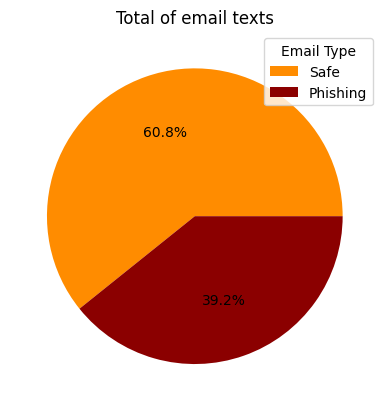

In [56]:
email_type = loaded_dataset['Email Type'].value_counts()

# Pie chart
plt.pie(email_type, colors=['darkorange', 'darkred'], autopct='%1.1f%%')
plt.title('Total of email texts')
plt.legend(['Safe', 'Phishing'], title='Email Type')
plt.show()

In [57]:
from sklearn.naive_bayes import ComplementNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [58]:
# Convert the label
loaded_dataset['Email Type'] = loaded_dataset['Email Type'].replace({'Safe Email': 1, 'Phishing Email': 0})
loaded_dataset.head()

/tmp/ipykernel_33/809667962.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loaded_dataset['Email Type'] = loaded_dataset['Email Type'].replace({'Safe Email': 1, 'Phishing Email': 0})


,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1
1,1,the other side of * galicismos * * galicismo *...,1
2,2,re : equistar deal tickets are you still avail...,1
3,3,\nHello I am your hot lil horny toy.\n I am...,0
4,4,software at incredibly low prices ( 86 % lower...,0


In [59]:
models = [ComplementNB(), BernoulliNB(), MultinomialNB()]
model_names = ['ComplementNB', 'BernoulliNB', 'MultinomialNB']

In [60]:
Safe_Email = loaded_dataset[loaded_dataset["Email Type"]== 1]
Phishing_Email = loaded_dataset[loaded_dataset["Email Type"]== 0]
Safe_Email = Safe_Email.sample(Phishing_Email.shape[0])

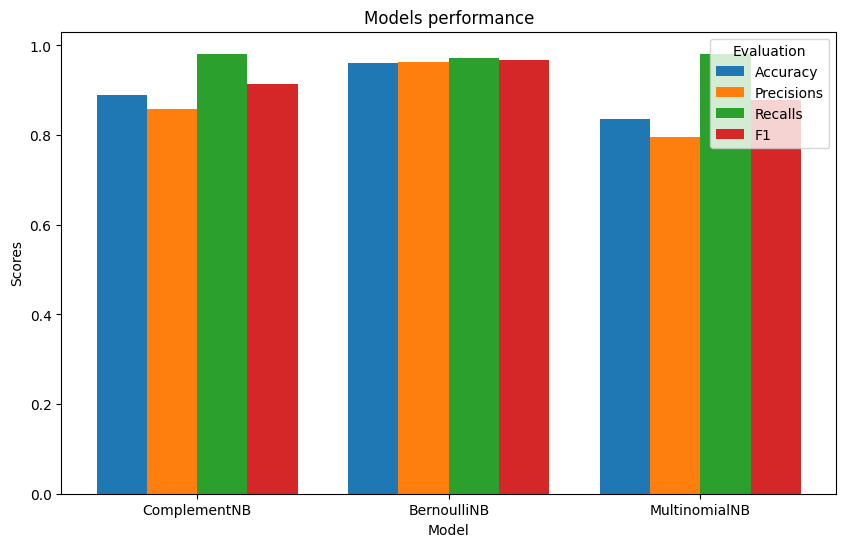

Model: ComplementNB
Accuracy: 0.889187013683928
F1 Score: 0.9150730002056343

Model: BernoulliNB
Accuracy: 0.9607593238529648
F1 Score: 0.9679364209372431

Model: MultinomialNB
Accuracy: 0.834987925945801
F1 Score: 0.8787341023365869



In [61]:

accuracies = []
precisions = []
recalls = []
f1 = []

# Convert feature with TF-ID
convert_feature = TfidfVectorizer()

X = convert_feature.fit_transform(loaded_dataset['Email Text'])
Y = loaded_dataset['Email Type']

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Calculate the performance
for idx,model in enumerate(models):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    joblib.dump(model, f"model_{model_names[idx]}.joblib")
    

    accuracies.append(accuracy_score(y_test, pred))
    precisions.append(precision_score(y_test, pred))
    recalls.append(recall_score(y_test, pred))
    f1.append(f1_score(y_test, pred))

axis = np.arange(len(model_names))

plt.figure(figsize=(10, 6))
plt.bar(axis - 0.3, accuracies, 0.2, label = 'Accuracy') 
plt.bar(axis - 0.1, precisions, 0.2, label = 'Precisions')
plt.bar(axis + 0.1, recalls, 0.2, label = 'Recalls')
plt.bar(axis + 0.3, f1, 0.2, label = 'F1')

plt.xticks(axis, model_names) 
plt.xlabel("Model") 
plt.ylabel("Scores") 
plt.title("Models performance") 
plt.legend(title="Evaluation") 
plt.show() 

# Printing accuracy and F1 score for each model
for i, model_name in enumerate(model_names):
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracies[i]}")
    print(f"F1 Score: {f1[i]}")
    print()


In [62]:
for model in models:
    convert_feature = TfidfVectorizer()

    X =  convert_feature.fit_transform(loaded_dataset['Email Text'])
    Y = loaded_dataset['Email Type']
    
    # Train the model
    model.fit(X, Y)

    # Predict new data
    new_data = ["re : 6 . 1100 , disc : uniformitarianism , re : 1086 ; sex / lang dick hudson 's observations on us use of 's on ' but not 'd aughter ' as a vocative are very thought-provoking , but i am not sure that it is fair to attribute this to "" sons "" being "" treated like senior relatives "" . for one thing , we do n't normally use ' brother ' in this way any more than we do 'd aughter ' , and it is hard to imagine a natural class comprising senior relatives and 's on ' but excluding ' brother ' . for another , there seem to me to be differences here . if i am not imagining a distinction that is not there , it seems to me that the senior relative terms are used in a wider variety of contexts , e . g . , calling out from a distance to get someone 's attention , and hence at the beginning of an utterance , whereas 's on ' seems more natural in utterances like ' yes , son ' , ' hand me that , son ' than in ones like ' son ! ' or ' son , help me ! ' ( although perhaps these latter ones are not completely impossible ) . alexis mr"]

    pred = model.predict(convert_feature.transform(new_data))

    if pred[0] == 0:
       print(f'Predicted by {type(model).__name__}: Phishing text')
    else:
       print(f'Predicted by {type(model).__name__}: Safe text')

Predicted by ComplementNB: Safe text
Predicted by BernoulliNB: Safe text
Predicted by MultinomialNB: Safe text


In [63]:
loaded_models = [joblib.load("/kaggle/working/model_MultinomialNB.joblib"),joblib.load("/kaggle/working/model_BernoulliNB.joblib")]
# Predict new data
new_data = ["re : 6 . 1100 , disc : uniformitarianism , re : 1086 ; sex / lang dick hudson 's observations on us use of 's on ' but not 'd aughter ' as a vocative are very thought-provoking , but i am not sure that it is fair to attribute this to "" sons "" being "" treated like senior relatives "" . for one thing , we do n't normally use ' brother ' in this way any more than we do 'd aughter ' , and it is hard to imagine a natural class comprising senior relatives and 's on ' but excluding ' brother ' . for another , there seem to me to be differences here . if i am not imagining a distinction that is not there , it seems to me that the senior relative terms are used in a wider variety of contexts , e . g . , calling out from a distance to get someone 's attention , and hence at the beginning of an utterance , whereas 's on ' seems more natural in utterances like ' yes , son ' , ' hand me that , son ' than in ones like ' son ! ' or ' son , help me ! ' ( although perhaps these latter ones are not completely impossible ) . alexis mr"]

for loaded_model in loaded_models:
    pred = loaded_model.predict(convert_feature.transform(new_data))
    if pred[0] == 0:
        print(f'Predicted by {type(loaded_model).__name__}: Phishing text')
    else:
        print(f'Predicted by {type(loaded_model).__name__}: Safe text')

Predicted by MultinomialNB: Safe text
Predicted by BernoulliNB: Safe text


In [64]:
joblib.dump(convert_feature, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']